### Assignment Week 2:

#### 2.1) Data exploration/Cleaning:

- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations


In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

# Import the CSV file with Pandas and convert 'Date' to datetime
cov = pd.read_csv("covid_19_uk_cases.csv", index_col=['Date'], parse_dates=['Date'])
vac = pd.read_csv("covid_19_uk_vaccinated.csv", index_col=['Date'], parse_dates=['Date'])

#### 2. Explore the shape of the Covid-19 cases dataset


<br>                                                                                                         </br>

##### The following cells will:

a) Check the shape of the data and detect and remove any missing values
   

In [38]:
print(cov.shape)
print(cov.info)
cov.describe()
#cov.columns

(7584, 11)
<bound method DataFrame.info of            Province/State  Country/Region      Lat     Long  \
Date                                                          
2020-01-22       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-23       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-24       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-25       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-26       Anguilla  United Kingdom  18.2206 -63.0686   
...                   ...             ...      ...      ...   
2021-10-10         Others  United Kingdom  55.3781  -3.4360   
2021-10-11         Others  United Kingdom  55.3781  -3.4360   
2021-10-12         Others  United Kingdom  55.3781  -3.4360   
2021-10-13         Others  United Kingdom  55.3781  -3.4360   
2021-10-14         Others  United Kingdom  55.3781  -3.4360   

           ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
Date                                                             

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


In [2]:
# Detect NaN values in the dataframe
cov.isnull().sum()

# Replace Null values with 0
cov.fillna(0, inplace=True)

# Confirm NaN values replaced
cov.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

##### Observations

We see that there are 11 columns in total(including the datetimeindex). The first 6 columns in this dataframe are geographical indicators. The remaining 4 (deaths,cases,recovered and hospitalised) contain the values that represent the figures for covid in the UK provinces.


##### The following cells will:

a) Create a 4 DataFrames that will each be grouped by Province/State and then be aggregated by one of the covid values columns (deaths, cases, recovered, hospitalised)

These DataFrames will then be merged into one DataFrame that gives us a clear picture of all of the aggregated values for the provinces in one place.
   

In [40]:

# group df and sum deaths
d_sum =cov.groupby('Province/State')['Deaths'].sum().reset_index().sort_values('Deaths', ascending=False)
                                                                             
# group df and sum cases
c_sum = cov.groupby('Province/State')['Cases'].sum().reset_index().sort_values('Cases', ascending=False)

# group df and sum hosipatlised
h_sum = cov.groupby('Province/State')['Recovered'].sum().reset_index().sort_values('Recovered', ascending=False)

# group df and sum hosipatlised
r_sum =cov.groupby('Province/State')['Hospitalised'].sum().reset_index().sort_values('Hospitalised', ascending=False)

# Merge the 4 dataframes into 2 dfs
h_r = pd.merge(h_sum, r_sum, on='Province/State', how='left')
d_c = pd.merge(d_sum, c_sum, on='Province/State', how='left')

# Further merge into a single df
province_totals = pd.merge(d_c, h_r, on='Province/State', how='left')
province_totals

,Province/State,Deaths,Cases,Recovered,Hospitalised
0,Others,46987145.0,1.621651e+09,4115.0,285768.0
1,Channel Islands,37130.0,1.957978e+06,1027626.0,363690.0
2,Gibraltar,25412.0,1.413853e+06,956103.0,649459.0
3,Isle of Man,15051.0,8.871330e+05,328319.0,467605.0
4,Bermuda,10353.0,6.854420e+05,363999.0,311547.0
5,Turks and Caicos Islands,5612.0,7.526180e+05,515923.0,337710.0
6,British Virgin Islands,3573.0,2.849610e+05,64359.0,571506.0
7,Cayman Islands,911.0,2.177560e+05,152052.0,389669.0
8,Montserrat,539.0,9.556000e+03,6376.0,597486.0
9,Anguilla,24.0,3.531500e+04,12708.0,545540.0


##### Observations:


We can see from the aggregated totals DataFrame above that the values for deaths and cases are very high indicating that these figures could be cummulative.

The figures for the Recovered column do not seem correct for the 'Others' province in comparison to other provinces. The 'Others' province has significantly higher deaths and cases than all the provinces combined yet has the second lowest recovered numbers. This leads me to suspect that there are missing values in the Recovered column for the 'Others' province.

The hospitalised values also look to be cummulative based on the totals in the dataframe. However, again the figures for 'Others' do not look correct. It is to be expected that the hospitalisation values should be higher than death figures and this is the case apart from 'Others' province. Again this leads me to suspect that there are missing values for the 'Others' province.

To further investigate these two columns I will create a subset of the data for 'Others'. I will then plot cases, deaths and recovered on the same time-series lineplot to see how they compare over time. I will do the same for deaths and hospitalisation.




In [17]:
# Create a subset of Cov DataFrame for 'Others'
others = cov[cov['Province/State']== 'Others']

others = others.loc[:,['Deaths','Cases','Recovered','Hospitalised']]
print(others.shape)


print(others.shape)


(632, 4)
(632, 4)


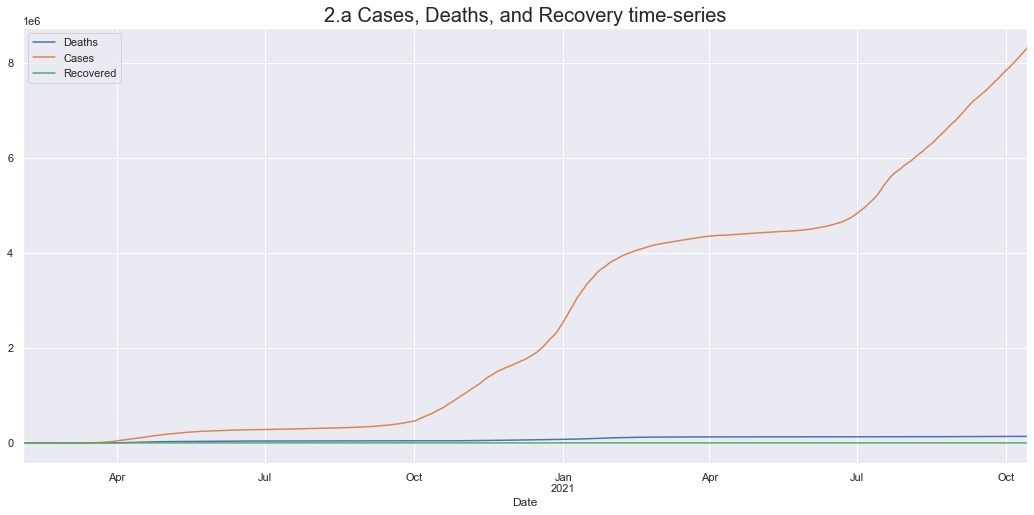

In [25]:
# Subset for 'Others' province
df1 = others.loc[:,['Deaths','Cases','Recovered']]

# we use [12:] to skip the first 12 months
for col_name in df1.columns.values[0:3]:
     df1[col_name][12:].plot(figsize=(18, 8))


        
plt.legend(loc='best')
plt.title('2.a Cases, Deaths, and Recovery time-series', fontsize=20)
plt.show(block=False)

In [22]:
# Count of the number of values in a specified column of the DataFrame.
print(cov['Province/State'].value_counts())

# Count the number of the most commonly occuring value in the Recovered culumn
print(cov.groupby('Province/State')['Recovered'].apply(lambda x: x.value_counts().head(1)))

Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
Others                                          632
Name: Province/State, dtype: int64
Province/State                                    
Anguilla                                      3.0     230
Bermuda                                       0.0     137
British Virgin Islands                        0.0     151
Cayman Islands                                0.0     144
Channel Islands                               0.0     143


#### Observation

We can clearly observe from the time-series lineplot above (figure 2.a) that the number of people who have recovered from Covid-19 is less than the number of deaths suggesting that there is missing data. This is confirmed with the cell above where we count the number of values recorded per province and then check the most common value recorded for each province. 

We observe here that 571 of the 632 total rows the value 0.0 is recorded for 'Others' proving that there is missing data leading to the conclusion to disregard this column in the following analysis.

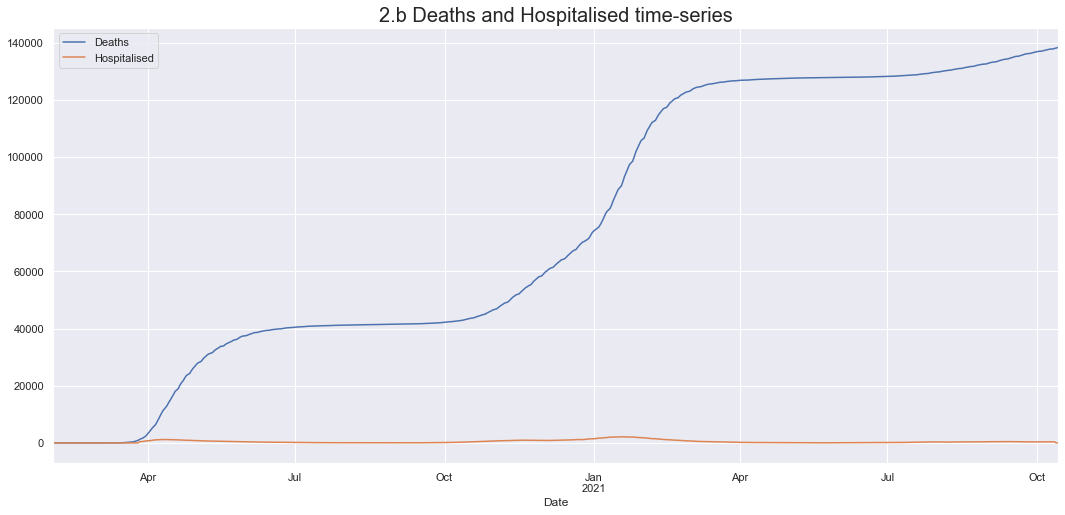

In [26]:
df2 = others.loc[:,['Deaths','Hospitalised']]

# we use [12:] to skip the first 12 months
for col_name in df2.columns.values[0:2]:
     df2[col_name][12:].plot(figsize=(18, 8))


        
plt.legend(loc='best')
plt.title('2.b Deaths and Hospitalised time-series',fontsize=20)
plt.show(block=False)


#### Observation

With the assumption that most deaths in the UK for Covid occur in hospitals we would expect that hospitalisation number will be greater than deaths. However as the visualisation above shows for this dataset that is not the case. Infact it looks the opposite. As a result we have to consider the hospitalisation data in this dataset to be unreliable.

<br>                                                                                                         </br>

#### 2.1 Explore the shape of the Vaccinations dataset





##### The following cells will:

a) Check the shape of the vaccines data and detect and remove any missing values
   

In [112]:
print(vac.shape)
print(vac.info)
vac.describe()
vac.columns

(7584, 10)
<bound method DataFrame.info of            Province/State  Country/Region      Lat     Long  \
Date                                                          
2020-01-22       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-23       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-24       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-25       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-26       Anguilla  United Kingdom  18.2206 -63.0686   
...                   ...             ...      ...      ...   
2021-10-10         Others  United Kingdom  55.3781  -3.4360   
2021-10-11         Others  United Kingdom  55.3781  -3.4360   
2021-10-12         Others  United Kingdom  55.3781  -3.4360   
2021-10-13         Others  United Kingdom  55.3781  -3.4360   
2021-10-14         Others  United Kingdom  55.3781  -3.4360   

           ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
Date                                                             

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')

##### The following cells will:

a) Detect and remove any NaN values in the datafram
   



In [113]:
# Detect NaN values in the dataframe
vac.isnull().sum()

# Replace Null values with 0
vac.fillna(0, inplace=True)

# Confirm NaN values replaced
vac.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

##### The following cells wil: 

• Aggregate vaccines DataFrame to see the total values for Vaccinated, First Dose and Second Dose grouped by province

• Create subset of the vaccinations dataframe for Gibraltar and plot the Vaccinated, First Dose and Second Dose columns.


In [116]:
# Aggregated sums for vaccinated, first dose and second dose grouped by province

# Vaccinated
print(vac.groupby('Province/State')['Vaccinated'].sum().reset_index().sort_values('Vaccinated', ascending=False))
                                                                             
# First Dose
print(vac.groupby('Province/State')['First Dose'].sum().reset_index().sort_values('First Dose', ascending=False))

# Second Dose
print(vac.groupby('Province/State')['Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False))


                                  Province/State  Vaccinated
6                                      Gibraltar     5606041
8                                     Montserrat     5157560
2                         British Virgin Islands     4933315
0                                       Anguilla     4709072
7                                    Isle of Man     4036345
5                    Falkland Islands (Malvinas)     3587869
3                                 Cayman Islands     3363624
4                                Channel Islands     3139385
11                      Turks and Caicos Islands     2915136
1                                        Bermuda     2690908
9                                         Others     2466669
10  Saint Helena, Ascension and Tristan da Cunha     2242421
                                  Province/State  First Dose
6                                      Gibraltar     5870786
8                                     Montserrat     5401128
2                       

##### Observations:

As the death and cases figures for 'Others' is very high I am working under the assumption that 'Others' represents the rest of the United Kingdom minus the small provinces represented in the two DataFrames. With that assumption I would expect the vaccination numbers to be consistent with population. However, the aggregated values for vaccinations do not support my assumption.

The values recorded by day flactuate up and down from day to day, suggesting that the attributed values are daily rather than cumulative. To confirm this I will create a subset for Gibraltar and plot Vaccinated, First Dose and Second Dose over time. 

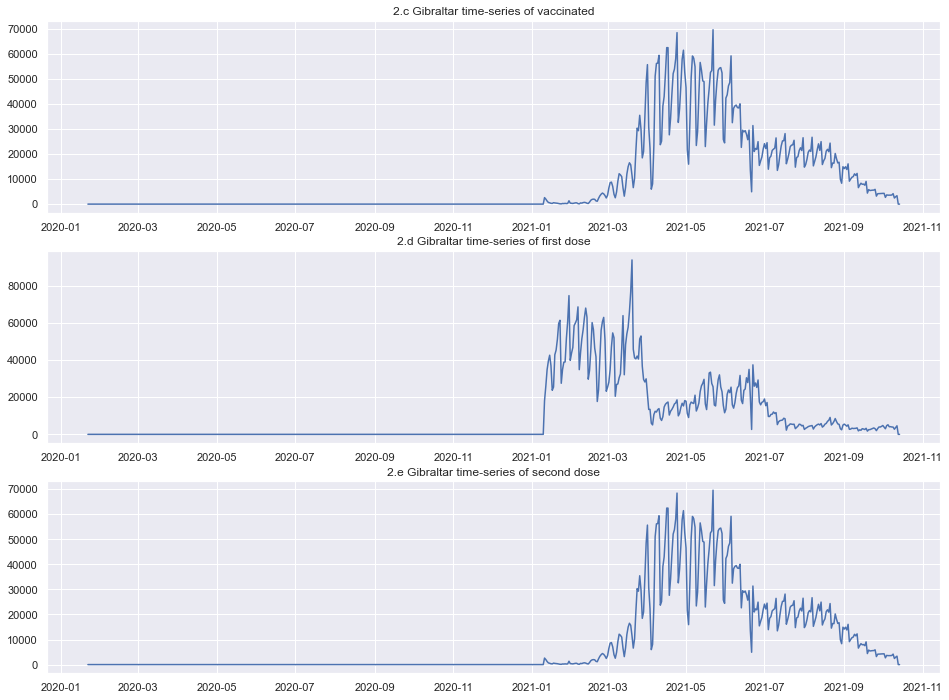

In [32]:
# Create a subset of the Vac DataFrame for Gibraltar

gibraltar_vac = vac[vac['Province/State']== 'Gibraltar']


# Plot time-series data for the columns.

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# Vaccinated:
axes[0].plot(gibraltar_vac['Vaccinated'])
axes[0].title.set_text('2.c Gibraltar time-series of vaccinated')

# First Dose:
axes[1].plot(gibraltar_vac['First Dose'])
axes[1].title.set_text('2.d Gibraltar time-series of first dose')

# Second Dose:
axes[2].plot(gibraltar_vac['Second Dose'])
axes[2].title.set_text('2.e Gibraltar time-series of second dose')

plt.show()

##### Observations

As expected the visualisation confirms that the values attributed to the dates are not cummulative and are instead daily as they flactuate over time.